# Home Credit Default Risk scoring

## 1-Import des données sur colab

In [1]:
from google.colab import drive

In [2]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import os

In [4]:
os.listdir('/gdrive/MyDrive/Projet7')

['application_train.csv', 'P7.ipynb']

In [5]:
import pandas as pd
data_1 =pd.read_csv('/gdrive/MyDrive/Projet7/application_train.csv')

In [6]:
data_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(f'Training dataset contains {data_1.shape[0]} records and {data_1.shape[1]} columns.')

Training dataset contains 307511 records and 122 columns.


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## 2- Exploration des données 

In [9]:
def missing_values(df):
        
        missing_values = df.isnull().sum()
        missing_values_percent = 100 * df.isnull().sum() / len(df)
        missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
        mis_val_table_ren_columns = missing_values_table.rename(
        columns = {0 : 'Nombre de valeurs manquantes', 1 : '% de valeurs manquantes'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0
                                                             ].sort_values('% de valeurs manquantes', ascending=False).round(1)
        
       
        return mis_val_table_ren_columns

In [10]:
missing_values(data_1)

,Nombre de valeurs manquantes,% de valeurs manquantes
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [11]:
data_1.duplicated().sum()

0

In [12]:
data_1.isna().sum().sum()

9152465

In [13]:
print(data_1['TARGET'].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


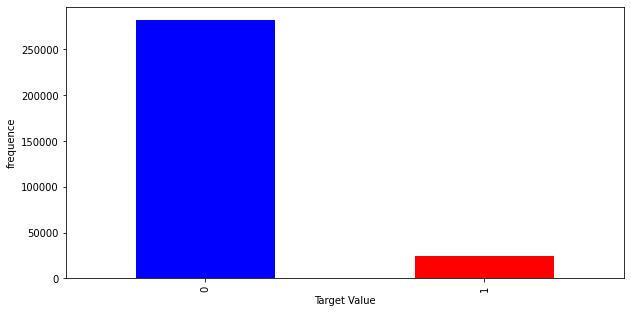

In [14]:
import matplotlib.pyplot as plt
data_1['TARGET'].value_counts()
data_1['TARGET'].value_counts().plot(kind='bar', figsize=(10,5), color = ['blue', 'red'])
plt.xlabel('Target Value')
plt.ylabel('frequence') 
plt.show()

In [15]:
print(data_1['CODE_GENDER'].value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [16]:
import numpy as np

In [17]:
def plot_bars(df, col):
    
    plt.figure(figsize = (11, 5))
    
    df_high = df[df['TARGET'] == 1].groupby(col)['TARGET'].agg('count')
    df_var = df.groupby(col)['TARGET'].agg('count')
    categorical = df_high.divide(df_var, fill_value = 0) * 100

  
    df_categorical = categorical.to_frame().reset_index().sort_values('TARGET', ascending = True)

  
    ax = df_categorical.plot(x = col, y = 'TARGET', kind = 'barh', figsize=(5,5), color = 'black')
    ax.set_xlabel('% de défauts')
    ax.set_ylabel(col)
    plt.title('% de défauts pour {}'.format(col.lower()));
    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<Figure size 792x360 with 0 Axes>

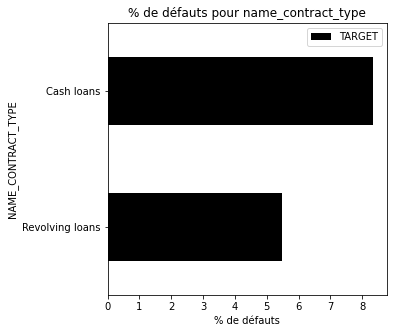

<Figure size 792x360 with 0 Axes>

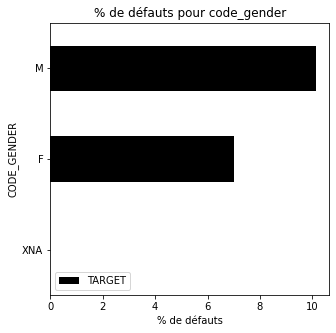

<Figure size 792x360 with 0 Axes>

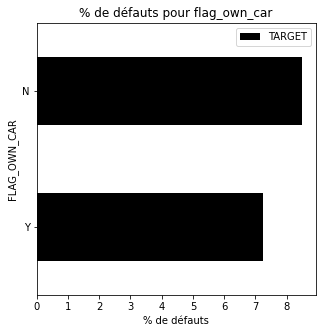

<Figure size 792x360 with 0 Axes>

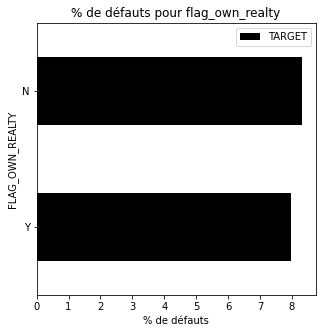

<Figure size 792x360 with 0 Axes>

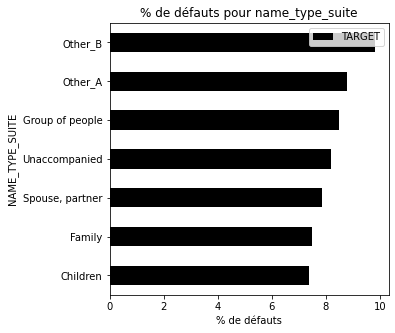

<Figure size 792x360 with 0 Axes>

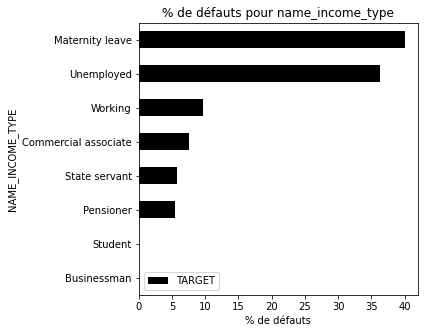

<Figure size 792x360 with 0 Axes>

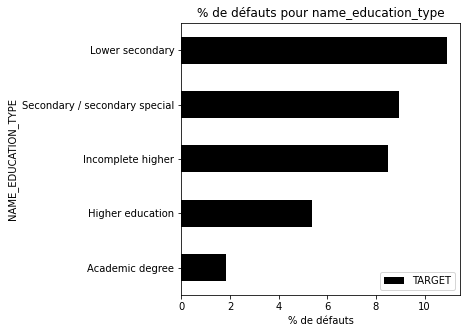

<Figure size 792x360 with 0 Axes>

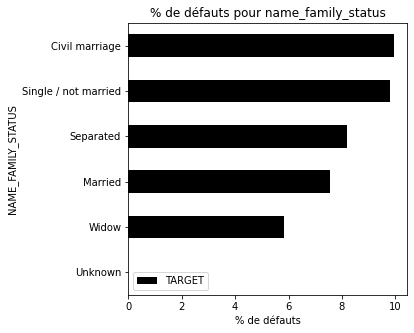

<Figure size 792x360 with 0 Axes>

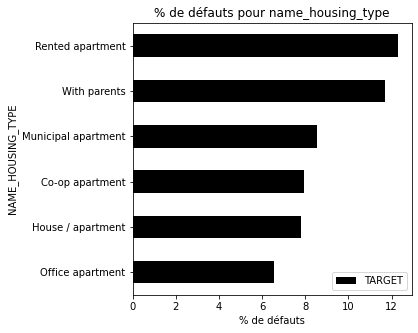

<Figure size 792x360 with 0 Axes>

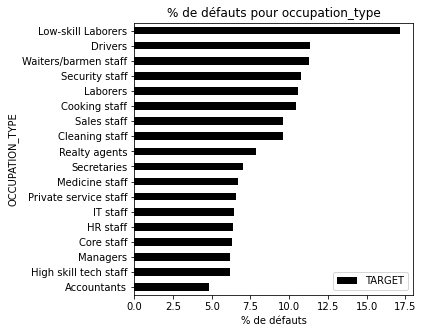

<Figure size 792x360 with 0 Axes>

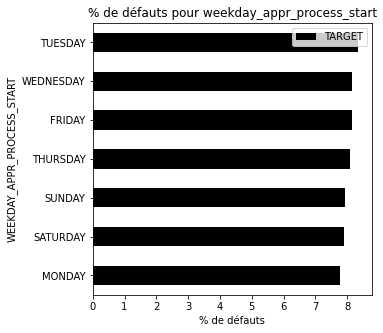

<Figure size 792x360 with 0 Axes>

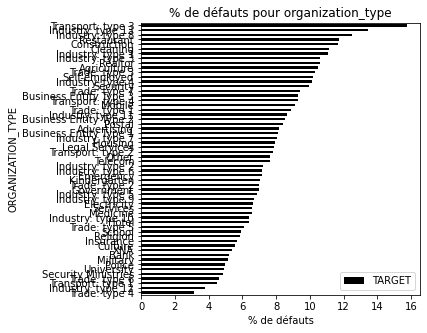

<Figure size 792x360 with 0 Axes>

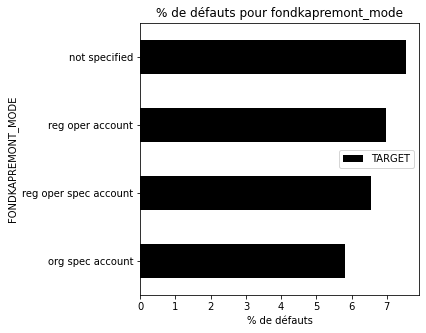

<Figure size 792x360 with 0 Axes>

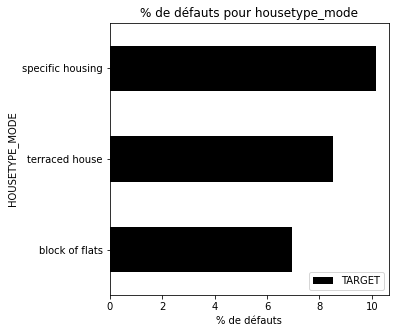

<Figure size 792x360 with 0 Axes>

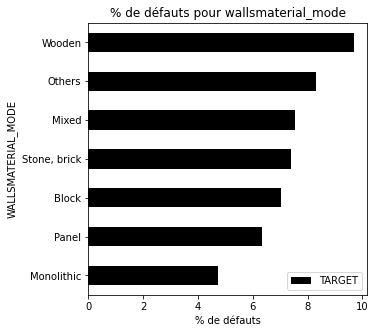

<Figure size 792x360 with 0 Axes>

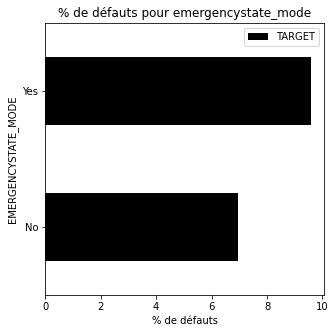

In [18]:
for col in data_1.loc[:, data_1.dtypes == np.object].columns.values:
    plot_bars(data_1, col)

In [19]:
data_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [20]:
df3=data_1.copy()

In [21]:
df3.fillna(value=df3.median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [22]:
missing_values(df3)

,Nombre de valeurs manquantes,% de valeurs manquantes
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4


### Traitement des valeurs abérentes, transformation des variables qualititatives

In [23]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding pour les données categorielles --> variables dichotomiques
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv
def application_train_test(num_rows = None, nan_as_category = False):
     
    df=df3.copy()
   
    df = df[df['CODE_GENDER'] != 'XNA']
    
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
   
    df, cat_cols = one_hot_encoder(df, nan_as_category)    
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    gc.collect()
    return df

In [24]:
df1=application_train_test()

In [25]:
missing_values(df1)

,Nombre de valeurs manquantes,% de valeurs manquantes
DAYS_EMPLOYED,55374,18.0
DAYS_EMPLOYED_PERC,55374,18.0


In [26]:
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].fillna(df1['DAYS_EMPLOYED'].median())
df1['DAYS_EMPLOYED_PERC'] = df1['DAYS_EMPLOYED_PERC'].fillna(df1['DAYS_EMPLOYED_PERC'].median())

In [27]:
missing_values(df1)

,Nombre de valeurs manquantes,% de valeurs manquantes


In [28]:
df1.isnull().sum()

SK_ID_CURR             0
TARGET                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
                      ..
DAYS_EMPLOYED_PERC     0
INCOME_CREDIT_PERC     0
INCOME_PER_PERSON      0
ANNUITY_INCOME_PERC    0
PAYMENT_RATE           0
Length: 247, dtype: int64

### Visualisation des nouvelles variables créées

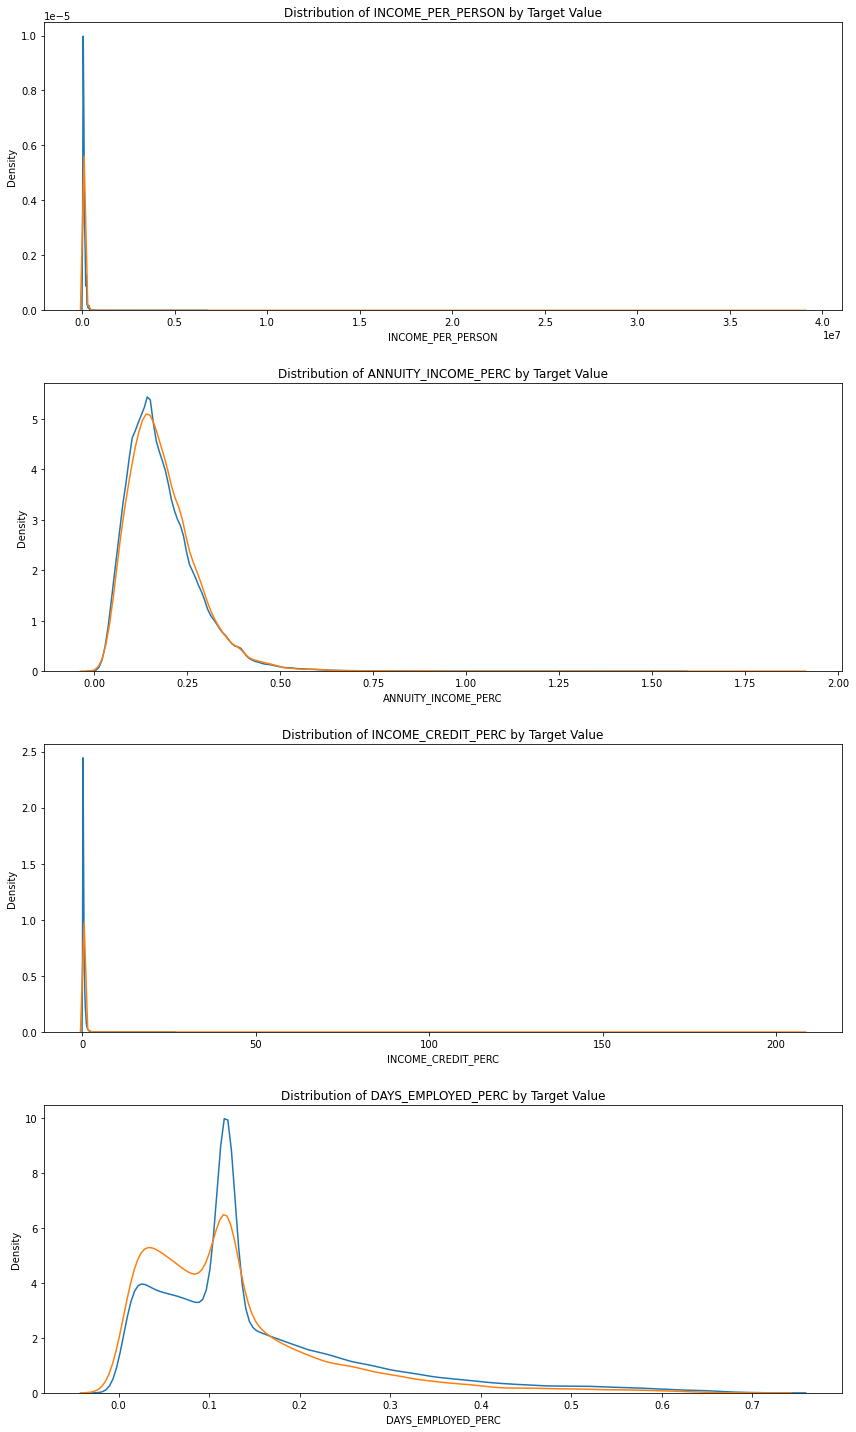

In [29]:
plt.figure(figsize=(12,20))
for i, feature in enumerate(['INCOME_PER_PERSON','ANNUITY_INCOME_PERC','INCOME_CREDIT_PERC','DAYS_EMPLOYED_PERC']):

    plt.subplot(4,1,i+1)
    sns.kdeplot(df1.loc[df1['TARGET']==0,feature],label='target==0')
    sns.kdeplot(df1.loc[df1['TARGET']==1,feature],label='target==1')
    
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature);
    plt.ylabel('Density');
    
plt.tight_layout(h_pad=2.5)

### Analyse des corrélations des variables avec la cible

In [30]:
correlations = df1.corr(method='pearson')['TARGET'].sort_values()

In [31]:
print('Most Positive Correlations:\n')
print(correlations.sort_values(ascending = False).head(16))
print('\nMost Negative Correlations:\n')
print(correlations.head(15))

Most Positive Correlations:

TARGET                                               1.000000
DAYS_BIRTH                                           0.078242
DAYS_EMPLOYED                                        0.063366
REGION_RATING_CLIENT_W_CITY                          0.060895
REGION_RATING_CLIENT                                 0.058901
NAME_INCOME_TYPE_Working                             0.057483
DAYS_LAST_PHONE_CHANGE                               0.055219
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050992
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049822
FLAG_EMP_PHONE                                       0.045984
REG_CITY_NOT_LIVE_CITY                               0.044394
FLAG_DOCUMENT_3                                      0.044341
OCCUPATION_TYPE_Laborers                             0.043017
DAYS_REGISTRATION                                    0.041976
LIVE_CITY_NOT_WORK_CITY                  

## 3- Modélisation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df1.drop('TARGET', axis=1)
y = df1['TARGET']

In [34]:
#X = X.drop('SK_ID_CURR',axis=1)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [36]:
#X_val.to_csv('X_test.csv')
#from google.colab import files
#files.download("X_test.csv")

### A- Equilibrage des données

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
oversampler = SMOTE(sampling_strategy=0.25)                     # minor/major = 1/4
undersampler = RandomUnderSampler(sampling_strategy=0.75)       # minor/major = 3/4

### B- Fonction de coût bancaire pour l'évaluation des modèles

In [40]:
def function_cout(y_val1,y_pre1):
  cnf_matrix = confusion_matrix(y_val1, y_pre1)
  tn, fp, fn, tp =cnf_matrix.ravel()
  cout=tn+fp*5+fn*40+tp
  return cout

In [41]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(function_cout, greater_is_better=False)

## C- Les arbres de décisions

#### Usage de SMOTE avec les arbres de décisions

In [42]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over),('model', model)]
pip_sm_decision_t= Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
scores = cross_val_score(pip_sm_decision_t, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.539


In [43]:
pip_sm_decision_t.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('model', DecisionTreeClassifier())])

In [44]:
y_pre_sm_decision_t = pip_sm_decision_t.predict(X_val)

In [45]:
# Validation de l'algorithme:  Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix

print("")
roc_sm_dec = roc_auc_score(y_val,y_pre_sm_decision_t)
c_bank_sm_dec= function_cout (y_val,y_pre_sm_decision_t)
a1_sm_dec = accuracy_score(y_val,y_pre_sm_decision_t)
f1_sm_dec = f1_score(y_val, y_pre_sm_decision_t, average="macro")
p1_sm_dec = precision_score(y_val, y_pre_sm_decision_t, average="macro")
r1_sm_dec = recall_score(y_val, y_pre_sm_decision_t, average="macro")

print("Coût bancaire SMOT Decisions trees : ",c_bank_sm_dec)
print("ROC AUC SMOT Decisions trees : ",roc_sm_dec)
print("f1 score SMOT Decisions trees : ",f1_sm_dec)
print("precision score SMOT Decisions trees: ",p1_sm_dec)
print("recall score SMOT Decisions trees : ",r1_sm_dec)


Coût bancaire SMOT Decisions trees :  244840
ROC AUC SMOT Decisions trees :  0.5342762462269048
f1 score SMOT Decisions trees :  0.530986305811379
precision score SMOT Decisions trees:  0.5290133444639725
recall score SMOT Decisions trees :  0.5342762462269047


In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[51360  5177]
 [ 4170   795]]


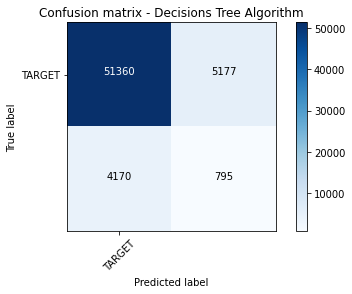

In [47]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_pre_sm_decision_t)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["TARGET"],
                      title='Confusion matrix - Decisions Tree Algorithm')

plt.show()

### Usage du RandomUnderSampler avec les arbres de décisions pour équilibrer les données

In [48]:
# define pipeline2
model = DecisionTreeClassifier()
under = RandomUnderSampler(sampling_strategy=0.5)
steps1 = [('under', under),('model', model)]
pip_rdus_dec_t = Pipeline(steps=steps1)
# evaluate pipeline1
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
scores = cross_val_score(pip_rdus_dec_t, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.579


In [49]:
pip_rdus_dec_t.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [50]:
y_rdus_dec_t = pip_rdus_dec_t.predict(X_val)

In [51]:
# Validation de l'algorithme: Performance metrics

print("")
roc_rdus_dec_t = roc_auc_score(y_val,y_rdus_dec_t)
c_bank_rdus_dec_t = function_cout (y_val,y_rdus_dec_t)
a1_rdus_dec_t = accuracy_score(y_val,y_rdus_dec_t)
f1_rdus_dec_t = f1_score(y_val, y_rdus_dec_t, average="macro")
p1_rdus_dec_t = precision_score(y_val, y_rdus_dec_t, average="macro")
r1_rdus_dec_t = recall_score(y_val,y_rdus_dec_t, average="macro")
print("Coût bancaire RandomUnderSampler Decisions trees : ",c_bank_rdus_dec_t)
print("ROC AUC RandomUnderSampler Decisions trees : ",roc_rdus_dec_t)

print("f1 score RandomUnderSampler Decisions trees : ",f1_rdus_dec_t)
print("precision score RandomUnderSampler Decisions trees : ",p1_rdus_dec_t)
print("recall score RandomUnderSampler Decisions trees : ",r1_rdus_dec_t)


Coût bancaire RandomUnderSampler Decisions trees :  232961
ROC AUC RandomUnderSampler Decisions trees :  0.5815768678857669
f1 score RandomUnderSampler Decisions trees :  0.4992919706754926
precision score RandomUnderSampler Decisions trees :  0.5286772789306341
recall score RandomUnderSampler Decisions trees :  0.5815768678857669


## D- Regression logistique 

### Usage de SMOTE avec la régression logistique

In [52]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=1000 )
over = SMOTE(sampling_strategy=0.1)
steps_2_1 = [('over', over),('model', model2)]
pip_logi_smot = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
scores = cross_val_score(pip_logi_smot, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip_logi_smot.fit(X_train,y_train)

# Printing the coefficients
print("intercept ")
print(model2.intercept_)
print("")
print("coefficients ")
print(model2.coef_)

y_pre_logi_smot = pip_logi_smot.predict(X_val)

Mean ROC AUC: 0.630
intercept 
[-1.14e-07]

coefficients 
[[-1.03e-06 -3.53e-07 -2.30e-07 -1.16e-07 -1.83e-07 -4.51e-07  3.11e-06
   3.40e-06 -3.90e-06 -6.22e-09  7.06e-05  9.97e-05  2.30e-05  8.03e-05
  -4.94e-07 -1.14e-07 -1.65e-07  6.74e-09 -1.14e-07 -1.25e-07 -4.73e-08
  -3.51e-07 -4.76e-08 -3.28e-08 -2.50e-06 -1.21e-08 -2.83e-08 -2.29e-08
   1.36e-09 -1.80e-08 -2.10e-08 -1.21e-07 -3.14e-07 -2.88e-07 -2.87e-08
  -1.59e-08 -1.14e-07 -9.44e-08 -8.75e-09 -3.31e-08 -2.41e-08 -5.81e-08
  -4.16e-08 -1.04e-08 -1.83e-08 -2.90e-08 -9.91e-10 -8.63e-09 -2.74e-08
  -1.53e-08 -1.14e-07 -9.48e-08 -8.17e-09 -3.09e-08 -2.24e-08 -5.65e-08
  -4.05e-08 -1.02e-08 -1.90e-08 -2.81e-08 -7.25e-10 -8.43e-09 -2.89e-08
  -1.56e-08 -1.15e-07 -9.48e-08 -8.79e-09 -3.27e-08 -2.38e-08 -5.80e-08
  -4.16e-08 -1.07e-08 -1.84e-08 -2.94e-08 -9.46e-10 -8.63e-09 -2.90e-08
   6.84e-08  1.21e-07  6.80e-08  9.82e-08  2.06e-04  3.53e-10  2.51e-08
  -1.87e-10 -5.75e-09 -5.70e-09 -1.00e-10 -7.85e-08 -5.40e-09 -6.81e-11
  -7.2

In [53]:
# Validation de l'algorithme: Performance metrics

print("")
roc_logi_smot = roc_auc_score(y_val,y_pre_logi_smot)
c_logi_smot_bank= function_cout (y_val,y_pre_logi_smot)
a1_logi_smot = accuracy_score(y_val,y_pre_logi_smot)
f1_logi_smot = f1_score(y_val, y_pre_logi_smot, average="macro")
p1_logi_smot = precision_score(y_val, y_pre_logi_smot, average="macro")
r1_logi_smot = recall_score(y_val, y_pre_logi_smot, average="macro")
print("Coût bancaire logistique Smot : ",c_logi_smot_bank)
print("ROC AUC logistique Smot : ",roc_logi_smot)

print("f1 score logistique Smot : ",f1_logi_smot)
print("precision score logistique Smot : ",p1_logi_smot)
print("recall score logistique Smot: ",r1_logi_smot)


Coût bancaire logistique Smot :  255145
ROC AUC logistique Smot :  0.49998231246794134
f1 score logistique Smot :  0.47895998712268195
precision score logistique Smot :  0.45963414634146343
recall score logistique Smot:  0.49998231246794134


#### Usage du RandomUnderSampler avec la regression logistique

In [54]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=1000 )

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model2)]
pip_logi_RDUS = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
scores = cross_val_score(pip_logi_RDUS, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip_logi_RDUS.fit(X_train,y_train)

# Printing the coefficients
print("intercept ")
print(model2.intercept_)
print("")
print("coefficients ")
print(model2.coef_)

y_pre_logi_RDUS = pip_logi_RDUS.predict(X_val)

Mean ROC AUC: 0.631
intercept 
[6.55e-08]

coefficients 
[[ 4.90e-07 -1.82e-07 -1.10e-07  5.51e-08  6.24e-08  2.15e-08  3.14e-06
   1.18e-05 -4.03e-06 -3.75e-09  2.62e-05  8.78e-05  1.47e-05  4.29e-05
   1.66e-06  6.55e-08  1.36e-07  1.51e-07  6.52e-08 -3.14e-08 -1.93e-08
   1.41e-07  4.57e-07  4.66e-07 -1.37e-07 -1.76e-09 -2.86e-10 -3.70e-09
   9.54e-08  1.65e-07  1.02e-07 -7.82e-08 -2.67e-07 -2.35e-07 -1.32e-08
  -3.04e-09  6.16e-08  4.21e-08 -5.61e-09 -3.27e-08 -1.48e-09 -2.95e-08
  -6.80e-09 -2.42e-09 -4.41e-09 -1.67e-08 -1.20e-09 -7.67e-09 -1.18e-08
  -2.26e-09  6.19e-08  4.33e-08 -5.15e-09 -3.00e-08  5.30e-10 -2.75e-08
  -5.44e-09 -2.36e-09 -4.15e-09 -1.51e-08 -9.86e-10 -7.79e-09 -1.36e-08
  -2.81e-09  6.14e-08  4.22e-08 -5.61e-09 -3.23e-08 -1.28e-09 -2.94e-08
  -6.61e-09 -2.64e-09 -4.41e-09 -1.71e-08 -1.17e-09 -7.71e-09 -1.69e-08
   4.05e-07  1.63e-07  3.98e-07  1.28e-07  1.54e-04  4.93e-10  2.23e-07
  -1.72e-10  3.66e-09 -2.94e-08  2.68e-10 -4.31e-08 -4.67e-09 -8.48e-11
  -3.83

In [55]:
# Validation de l'algorithme: Performance metrics

print("")
roc_logi_RDUS = roc_auc_score(y_val,y_pre_logi_RDUS)
c_logi_RDUS_bank= function_cout (y_val,y_pre_logi_RDUS)
a1_logi_RDUS = accuracy_score(y_val,y_pre_logi_RDUS)
f1_logi_RDUS = f1_score(y_val, y_pre_logi_RDUS, average="macro")
p1_logi_RDUS = precision_score(y_val, y_pre_logi_RDUS, average="macro")
r1_logi_RDUS = recall_score(y_val, y_pre_logi_RDUS, average="macro")
print("Coût bancaire logistique RandomUnderSampler : ",c_logi_RDUS_bank)
print("ROC AUC logistique RandomUnderSampler : ",roc_logi_RDUS)

print("f1 score logistique RandomUnderSampler : ",f1_logi_RDUS)
print("precision score logistique RandomUnderSampler : ",p1_logi_RDUS)
print("recall score logistique RandomUnderSampler : ",r1_logi_RDUS)


Coût bancaire logistique RandomUnderSampler :  249928
ROC AUC logistique RandomUnderSampler :  0.5145716978361772
f1 score logistique RandomUnderSampler :  0.5120477330862465
precision score logistique RandomUnderSampler :  0.5699473591471742
recall score logistique RandomUnderSampler :  0.5145716978361772


In [56]:
#'DAYS_EMPLOYED_PERC','INCOME_CREDIT_PERC','INCOME_PER_PERSON','ANNUITY_INCOME_PERC','PAYMENT_RATE']

## Model logistique avec une selection de variables

In [57]:
feat1=['DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_INCOME_TYPE_Working','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_EMPLOYED_PERC','NAME_EDUCATION_TYPE_Higher education']

In [58]:
X = df1[feat1]
y = df1['TARGET']
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

#### Smote avec une sélection de variables dans le model logistique 

In [59]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
over = SMOTE(sampling_strategy=0.1)
steps_2_1 = [('over', over),('model', model2)]
pip2_log_smot = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)
scores = cross_val_score(pip2_log_smot, X_train2,y_train2, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip2_log_smot.fit(X_train2,y_train2)

# Printing the coefficients
print("intercept ")
print(model2.intercept_)
print("")
print("coefficients ")
print(model2.coef_)

y_pre2_log_smot = pip2_log_smot.predict(X_val2)

Mean ROC AUC: 0.632
intercept 
[-2.68e-07]

coefficients 
[[ 1.01e-04  1.11e-04 -2.45e-07 -2.63e-07 -9.58e-08  2.47e-04  1.00e-04
  -4.60e-07 -4.06e-07 -1.96e-07 -3.37e-08 -5.09e-07]]


In [60]:
# Validation de l'algorithme: Performance metrics
print("")

roc_2_log_smot = roc_auc_score(y_val,y_pre2_log_smot)
c_bank_2_log_smot= function_cout (y_val,y_pre2_log_smot)
a1_2_log_smot = accuracy_score(y_val,y_pre2_log_smot)
f1_2_log_smot = f1_score(y_val, y_pre2_log_smot, average="macro")
p1_2_log_smot = precision_score(y_val, y_pre2_log_smot, average="macro")
r1_2_log_smot = recall_score(y_val, y_pre2_log_smot, average="macro")
print("Coût bancaire logistique2 smot : ",c_bank_2_log_smot)
print("ROC AUC logistique2 smot : ",roc_2_log_smot)

print("f1 score logistique2 smot : ",f1_2_log_smot)
print("precision score logistique2 smot : ",p1_2_log_smot)
print("recall score logistique2 smot : ",r1_2_log_smot)


Coût bancaire logistique2 smot :  255137
ROC AUC logistique2 smot :  0.5
f1 score logistique2 smot :  0.47896881539152314
precision score logistique2 smot :  0.4596354590094631
recall score logistique2 smot :  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random  under sampler avec une sélection de variables dans une régression logistique 

In [61]:
from sklearn.linear_model import LogisticRegression
model2_21 = LogisticRegression()

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model2_21)]

pip2_log_under = Pipeline(steps=steps_2_1)


cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)
scores = cross_val_score(pip2_log_under, X_train2,y_train2, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))


pip2_log_under.fit(X_train2,y_train2)


print("intercept ")
print(model2_21.intercept_)
print("")
print("coefficients ")
print(model2_21.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre2_log_under = pip2_log_under.predict(X_val2)

Mean ROC AUC: 0.640
intercept 
[0.05]

coefficients 
[[ 6.44e-05  1.05e-04  2.19e-01  2.16e-01  1.23e-01  1.87e-04  7.12e-05
  -9.15e-02 -7.96e-02 -2.27e-02  1.81e-03 -9.23e-02]]


In [62]:
# Validation de l'algorithme: Performance metrics
print("")

roc_2_log_under = roc_auc_score(y_val,y_pre2_log_under)
c_bank_2_log_under= function_cout (y_val,y_pre2_log_under)
a1_2_log_under = accuracy_score(y_val,y_pre2_log_under)
f1_2_log_under = f1_score(y_val, y_pre2_log_under, average="macro")
p1_2_log_under = precision_score(y_val, y_pre2_log_under, average="macro")
r1_2_log_under = recall_score(y_val, y_pre2_log_under, average="macro")
print("Coût bancaire logistique2 under : ",c_bank_2_log_under)
print("ROC AUC logistique2 under : ",roc_2_log_under)

print("f1 score logistique2 under : ",f1_2_log_under)
print("precision score logistique2 under : ",p1_2_log_under)
print("recall score logistique2 under : ",r1_2_log_under)


Coût bancaire logistique2 under :  240143
ROC AUC logistique2 under :  0.544414908818991
f1 score logistique2 under :  0.5458391533120058
precision score logistique2 under :  0.547489330933208
recall score logistique2 under :  0.544414908818991


## E- GradientBoosting: LightGBM Classifier

#### Smote avec Gradient Boosting LightGBM classifier

In [63]:
from lightgbm import LGBMClassifier

In [64]:
model3 = LGBMClassifier()

steps_3_1 = [('over', over),('model', model3)]
pip_LGBM_Smot = Pipeline(steps=steps_3_1)


cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_Smot, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_Smot.fit(X_train,y_train)

y_pre_lgm_Smot = pip_LGBM_Smot.predict(X_val)

Mean ROC AUC: 0.756


In [65]:
# Validation de l'algorithme: Performance metrics

print("")
roc_lgm_Smot = roc_auc_score(y_val,y_pre_lgm_Smot)
c_bank_lgm_Smot= function_cout (y_val,y_pre_lgm_Smot)
a1_lgm_Smot = accuracy_score(y_val,y_pre_lgm_Smot)
f1_lgm_Smot = f1_score(y_val, y_pre_lgm_Smot, average="macro")
p1_lgm_Smot = precision_score(y_val,y_pre_lgm_Smot, average="macro")
r1_lgm_Smot = recall_score(y_val, y_pre_lgm_Smot, average="macro")
print("Coût bancaire LGBMClassifier Smot : ",c_bank_lgm_Smot)
print("ROC AUC LGBMClassifier Smot: ",roc_lgm_Smot)

print("f1 score LGBMClassifier Smot : ",f1_lgm_Smot)
print("precision score LGBMClassifier Smot : ",p1_lgm_Smot)
print("recall score LGBMClassifier Smot : ",r1_lgm_Smot)


Coût bancaire LGBMClassifier Smot :  251411
ROC AUC LGBMClassifier Smot:  0.5097147460634154
f1 score LGBMClassifier Smot :  0.498987847763302
precision score LGBMClassifier Smot :  0.7694492572331397
recall score LGBMClassifier Smot :  0.5097147460634154


#### RandomUnderSampler avec l'algorithme LGBM

In [66]:
model3 = LGBMClassifier()

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model3)]

pip_LGBM_RDUS = Pipeline(steps=steps_2_1)

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_RDUS, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_RDUS.fit(X_train,y_train)

y_pre_lgm_rdus = pip_LGBM_RDUS.predict(X_val)

Mean ROC AUC: 0.756


In [67]:
# Validation de l'algorithme: Performance metrics
print("")
roc_lgm_rdus = roc_auc_score(y_val,y_pre_lgm_rdus)
c_bank_lgm_rdus= function_cout (y_val,y_pre_lgm_rdus)
a1_lgm_rdus = accuracy_score(y_val,y_pre_lgm_rdus)
f1_lgm_rdus = f1_score(y_val, y_pre_lgm_rdus, average="macro")
p1_lgm_rdus = precision_score(y_val,y_pre_lgm_rdus, average="macro")
r1_lgm_rdus = recall_score(y_val, y_pre_lgm_rdus, average="macro")
print("Coût bancaire LGBMClassifier RandomUnderSampler : ",c_bank_lgm_rdus)
print("ROC AUC LGBMClassifier RandomUnderSampler: ",roc_lgm_rdus)

print("f1 score LGBMClassifier RandomUnderSampler : ",f1_lgm_rdus)
print("precision score LGBMClassifier RandomUnderSampler : ",p1_lgm_rdus)
print("recall score LGBMClassifier RandomUnderSampler : ",r1_lgm_rdus)


Coût bancaire LGBMClassifier RandomUnderSampler :  197136
ROC AUC LGBMClassifier RandomUnderSampler:  0.6599006762248095
f1 score LGBMClassifier RandomUnderSampler :  0.612464168704947
precision score LGBMClassifier RandomUnderSampler :  0.5949039747973224
recall score LGBMClassifier RandomUnderSampler :  0.6599006762248095


### LGBM avec une selection des données

#### Smot utilisé avec LGBM et selection de données

In [68]:
X = df1[feat1]
y = df1['TARGET']
X_train3, X_val3, y_train3, y_val3 = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [69]:
model3 = LGBMClassifier()

steps_3_2 = [('over', over),('model', model3)]
pip_LGBM_Smot2 = Pipeline(steps=steps_3_2)

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_Smot2, X_train3,y_train3, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_Smot2.fit(X_train3,y_train3)

y_pre_LGBM_Smot2 = pip_LGBM_Smot2.predict(X_val3)

Mean ROC AUC: 0.731


In [70]:
# Validation de l'algorithme: Performance metrics

print("")
roc_LGBM_Smot2 = roc_auc_score(y_val3,y_pre_LGBM_Smot2)
c_bank_LGBM_Smot2= function_cout (y_val3,y_pre_LGBM_Smot2)
a1_LGBM_Smot2 = accuracy_score(y_val3,y_pre_LGBM_Smot2)
f1_LGBM_Smot2 = f1_score(y_val3,y_pre_LGBM_Smot2, average="macro")
p1_LGBM_Smot2 = precision_score(y_val3,y_pre_LGBM_Smot2, average="macro")
r1_LGBM_Smot2 = recall_score(y_val3,y_pre_LGBM_Smot2, average="macro")
print("Coût bancaire LGBMClassifier Smot future selection : ",c_bank_LGBM_Smot2)
print("ROC AUC LGBMClassifier Smot future selection : ",roc_LGBM_Smot2)

print("f1 score LGBMClassifier Smot future selection : ",f1_LGBM_Smot2)
print("precision score LGBMClassifier Smot future selection : ",p1_LGBM_Smot2)
print("recall score LGBMClassifier Smot future selection: ",r1_LGBM_Smot2)


Coût bancaire LGBMClassifier Smot future selection :  253658
ROC AUC LGBMClassifier Smot future selection :  0.5038635893353337
f1 score LGBMClassifier Smot future selection :  0.4871441624642732
precision score LGBMClassifier Smot future selection :  0.7486549090574768
recall score LGBMClassifier Smot future selection:  0.5038635893353337


In [71]:
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

#### RandomUnderSampler avec LGBM et selection de variables

In [72]:
model3 = LGBMClassifier()

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model3)]

pip_LGBM_RDUS2 = Pipeline(steps=steps_2_1)

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_RDUS2, X_train3,y_train3, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_RDUS2.fit(X_train3,y_train3)

y_pre_lgm_rdus2 = pip_LGBM_RDUS2.predict(X_val3)

Mean ROC AUC: 0.733


In [73]:
# Validation de l'algorithme: Performance metrics

print("")
roc_lgm_rdus2 = roc_auc_score(y_val,y_pre_lgm_rdus2)
c_bank_lgm_rdus2= function_cout (y_val,y_pre_lgm_rdus2)
a1_lgm_rdus2 = accuracy_score(y_val,y_pre_lgm_rdus2)
f1_lgm_rdus2 = f1_score(y_val, y_pre_lgm_rdus2, average="macro")
p1_lgm_rdus2 = precision_score(y_val,y_pre_lgm_rdus2, average="macro")
r1_lgm_rdus2 = recall_score(y_val, y_pre_lgm_rdus2, average="macro")
print("Coût bancaire LGBMClassifier RandomUnderSampler Feature selection : ",c_bank_lgm_rdus2)
print("ROC AUC LGBMClassifier RandomUnderSampler Feature selection: ",roc_lgm_rdus2)

print("f1 score LGBMClassifier RandomUnderSampler Feature selection : ",f1_lgm_rdus2)
print("precision score LGBMClassifier RandomUnderSampler Feature selection : ",p1_lgm_rdus2)
print("recall score LGBMClassifier RandomUnderSampler Feature selection : ",r1_lgm_rdus2)


Coût bancaire LGBMClassifier RandomUnderSampler Feature selection :  204361
ROC AUC LGBMClassifier RandomUnderSampler Feature selection:  0.6410454588989225
f1 score LGBMClassifier RandomUnderSampler Feature selection :  0.6015337518870796
precision score LGBMClassifier RandomUnderSampler Feature selection :  0.5863777759754683
recall score LGBMClassifier RandomUnderSampler Feature selection :  0.6410454588989225


## F- Optimisation des hyperparametres du model choisi: 
##    LightGBM Classifier avec Random Under Sampler

In [74]:
X = df1.drop('TARGET', axis=1)
y = df1['TARGET']

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [76]:
start = time.time()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()

parameters = {'model__num_leaves':[20,40,60,80,100], 'model__min_child_samples':[5,10,15],'model__max_depth':[-1,5,10,20],
             'model__learning_rate':[0.05,0.1,0.2],'model__reg_alpha':[0,0.01,0.03]}

under = RandomUnderSampler(sampling_strategy=0.5)
steps1 = [('under', under),('model', lgb)]
pipeline1 = Pipeline(steps=steps1)

clf=RandomizedSearchCV(pipeline1,parameters,scoring=ftwo_scorer,cv=2,
                                refit=True,
                                verbose=True)
clf.fit(X=X_train, y=y_train)

print(clf.best_params_)
print(clf.best_score_)

predicted=clf.predict(X_val)
print('Classification of the result is:')
print(accuracy_score(y_val, predicted))
print(function_cout (y_val, predicted))
print(roc_auc_score (y_val, predicted))

end = time.time()
print('Execution time is:')
print(end - start)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'model__reg_alpha': 0.01, 'model__num_leaves': 20, 'model__min_child_samples': 15, 'model__max_depth': 20, 'model__learning_rate': 0.2}
-401268.0
Classification of the result is:
0.8438262170335924
197187
0.6597734399921797
Execution time is:
96.76385712623596


In [77]:
opt_parameters = {'model__reg_alpha': 0.03, 'model__num_leaves': 100, 'model__min_child_samples': 15, 'model__max_depth': 10, 'model__learning_rate': 0.1}

In [78]:
model_final = LGBMClassifier (model__reg_alpha = 0.03, 
                             model__num_leaves = 100, 
                             model__min_child_samples = 15,
                             model__max_depth = 10, 
                             model__learning_rate = 0.1)

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model_final)]

pip_Final = Pipeline(steps=steps_2_1)

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores2 = cross_val_score(pip_Final, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores2))

pip_Final.fit(X_train,y_train)

y_pre_final = pip_Final.predict(X_val)
roc_final = roc_auc_score(y_val,y_pre_final)
print("ROC AUC LGBMClassifier final model: ",roc_final)

Mean ROC AUC: 0.755
ROC AUC LGBMClassifier final model:  0.6591209980556004


In [79]:
pip_Final.score (X_train,y_train)

0.8483933253389159

In [80]:
pip_Final.score (X_val,y_val)

0.8429644564404409

## Export du model sous extension PKL

In [81]:
#pickle.dump(pip_Final, open('model.pkl','wb'))

In [82]:
#from google.colab import files
#files.download('model.pkl')

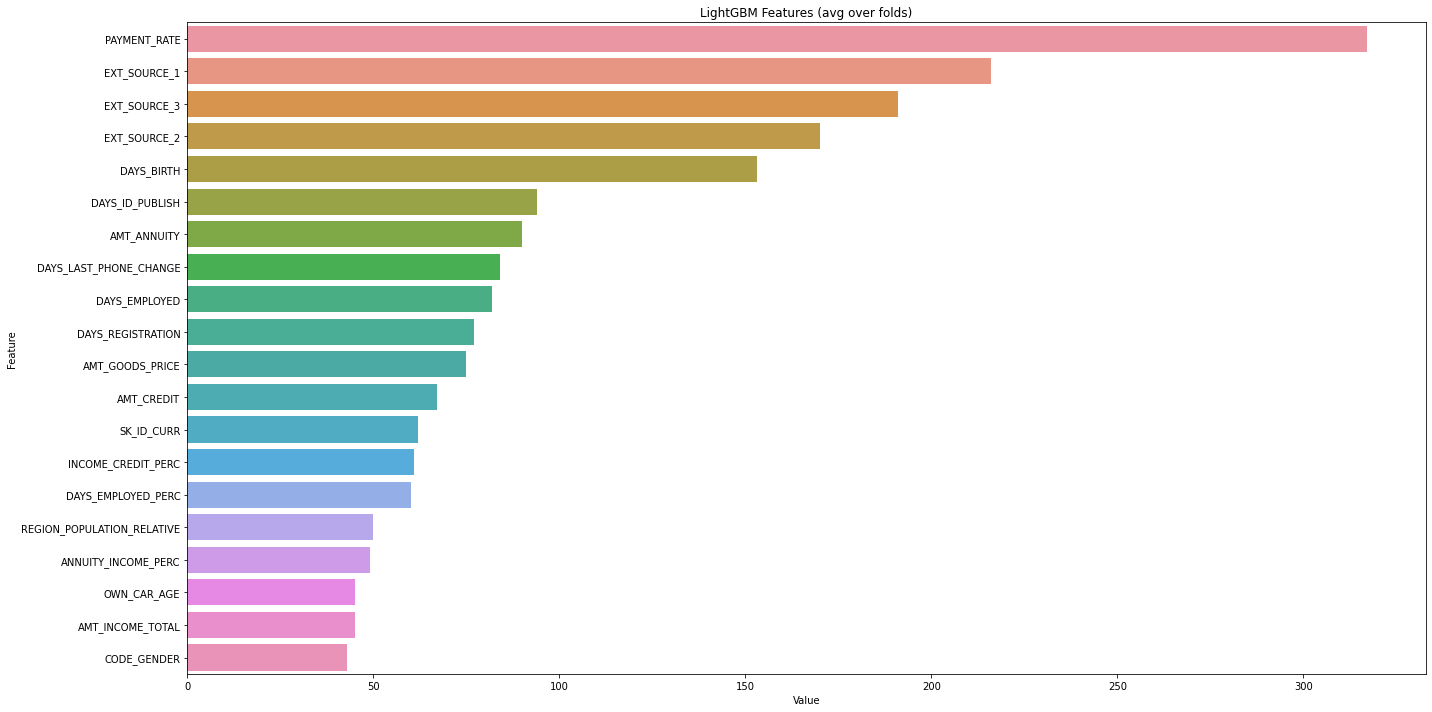

<Figure size 432x288 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(model_final.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:20])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

# Entrainement du model sans Pipline pour des contraintes d'espace pour installer la librairie RandomUnderSampler sur Python Anywhere.

### Equilibrage des données avec RandomUnderSampler

In [84]:
X_Train_res, y_Train_res = under.fit_resample(X_train, y_train)

### Entrainer le model sur les données équilibrées

In [85]:
model_final = LGBMClassifier (model__reg_alpha = 0.03, 
                             model__num_leaves = 100, 
                             model__min_child_samples = 15,
                             model__max_depth = 10, 
                             model__learning_rate = 0.1)


cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores2 = cross_val_score(model_final, X_Train_res,y_Train_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores2))

model_final.fit(X_Train_res,y_Train_res)

y_pre_final = model_final.predict(X_val)
roc_final = roc_auc_score(y_val,y_pre_final)
print("ROC AUC LGBMClassifier final model: ",roc_final)

Mean ROC AUC: 0.754
ROC AUC LGBMClassifier final model:  0.6600470267481262


In [86]:
import pickle as pk

In [87]:
#pickle.dump(model_final, open('model2.pkl','wb'))

In [88]:
from google.colab import files

In [89]:
#files.download('model2.pkl')

In [90]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import lime
from lime import lime_tabular

In [92]:
interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [93]:
exp = interpretor.explain_instance(
    data_row=X_val.iloc[5], ##new data
    predict_fn=pip_Final.predict_proba
)

exp.show_in_notebook(show_table=True)

# Entrainement du deuxième model pour le déployement suite à des problèmes d'espaces pour installer la librairie lightgbm sur Python Anywhere. 
# Le model obtenu à l'aide de l'algorithme des arbres de décisions sera finalement déployé car nécessitant d'installation de librairie sur python anywhere

In [94]:
# Decision trees deploiement

In [95]:
pip_rdus_dec_t

Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [96]:
X = df1.drop('TARGET', axis=1)
y = df1['TARGET']

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [98]:
X_Train_res1, y_Train_res2 = under.fit_resample(X_train, y_train)

In [99]:
#params = {
#    'model__max_depth': [2, 3, 5, 10, 20],
#    'model__min_samples_leaf': [5, 10, 20, 50, 100],
#    'model__criterion': ["gini", "entropy"]
#}

In [101]:
#grid_search = GridSearchCV(estimator=pip_rdus_dec_t, 
#                           param_grid=params, 
#                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [102]:
#grid_search.fit(X_Train_res1, y_Train_res2)

In [103]:
#grid_search.best_estimator_

In [104]:
Model_fin3 = DecisionTreeClassifier (max_depth = 10, 
                             min_samples_leaf = 100
                             )


cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores2 = cross_val_score(Model_fin3, X_Train_res1, y_Train_res2, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores2))

Model_fin3.fit(X_Train_res1, y_Train_res2)

y_pre_final3 = Model_fin3.predict(X_val)
roc_final3 = roc_auc_score(y_val,y_pre_final3)
print("ROC AUC Decision Tree model: ",roc_final3)

Mean ROC AUC: 0.703
ROC AUC Decision Tree model:  0.6309521586813516


In [105]:
#pickle.dump(Model_fin3, open('Model_f3.pkl','wb'))

In [106]:
#from google.colab import files

In [107]:
#files.download('Model_f3.pkl')

### Interpretation globale du model d'arbre de décisions

In [108]:
interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

## Interprétation locale du model d'arbre de décisions par client

In [110]:
exp = interpretor.explain_instance(
    data_row=X_val.iloc[2], ##new data
    predict_fn=Model_fin3.predict_proba
)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df1= X_val.head(150)

In [ ]:
l = {}
for index,row in df1.iterrows():
     exp = interpretor.explain_instance(row, model.predict_proba, num_features=10)
     l[str(row['SK_ID_CURR'])]=exp

In [ ]:
pickle.dump(l, open('local_I.pkl','wb'))

In [ ]:
df1.to_csv('X_test1.csv',index=False)